In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import pickle

In [2]:
df = pd.read_csv("C:\\Users\\91878\\Downloads\\spam.csv", encoding="ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# Explore data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Check for missing values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [8]:
df['v1'].value_counts()   

v1
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
# Label encoding
label_encoder = LabelEncoder()    # 0: ham and 1: 
df['v1'] = label_encoder.fit_transform(df['v1'])

In [10]:
# Selecting features and target
x = df['v2']
y = df['v1']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)      # splitting the data into training data and test data
print(x_train.shape, x_test.shape, x.shape)
print(y_train.shape, y_test.shape, y.shape)

(4457,) (1115,) (5572,)
(4457,) (1115,) (5572,)


In [12]:
# transform the text data to feature vectors that can be used as input 
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

In [13]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

## 1. Logistic Regression

In [14]:
model = LogisticRegression(random_state=42)
model.fit(x_train_features, y_train)

y_train_prediction = model.predict(x_train_features)
training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print("Accuracy on training data = ", training_data_accuracy)
print("Classification Report: \n", classification_report(y_train, y_train_prediction))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_train_prediction))

y_test_pred_logistic = model.predict(x_test_features)
testing_data_accuracy = accuracy_score(y_test, y_test_pred_logistic)
print("\n\nAccuracy on testing data = ", testing_data_accuracy)
print("Classification Report: \n", classification_report(y_test, y_test_pred_logistic))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred_logistic))

Accuracy on training data =  0.9692618353152345
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3860
           1       1.00      0.77      0.87       597

    accuracy                           0.97      4457
   macro avg       0.98      0.89      0.93      4457
weighted avg       0.97      0.97      0.97      4457

Confusion Matrix: 
 [[3858    2]
 [ 135  462]]


Accuracy on testing data =  0.9524663677130045
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Confusion Matrix: 
 [[962   3]
 [ 50 100]]


## 2. Random Forest

In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_features, y_train)

y_train_prediction = rf.predict(x_train_features)
training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print("Accuracy on training data = ", training_data_accuracy)
print("Classification Report: \n", classification_report(y_train, y_train_prediction))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_train_prediction))

y_test_pred_rf = rf.predict(x_test_features)
testing_data_accuracy = accuracy_score(y_test, y_test_pred_rf)
print("\n\nAccuracy on testing data = ", testing_data_accuracy)
print("Classification Report: \n", classification_report(y_test, y_test_pred_rf))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred_rf))

Accuracy on training data =  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3860
           1       1.00      1.00      1.00       597

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457

Confusion Matrix: 
 [[3860    0]
 [   0  597]]


Accuracy on testing data =  0.9766816143497757
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix: 
 [[964   1]
 [ 25 125]]


## 3. Support Vector Machine

In [16]:
svc = SVC(random_state=42)
svc.fit(x_train_features, y_train)

y_train_prediction = svc.predict(x_train_features)
training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print("Accuracy on training data = ", training_data_accuracy)
print("Classification Report: \n", classification_report(y_train, y_train_prediction))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_train_prediction))

y_test_pred_svc = svc.predict(x_test_features)
testing_data_accuracy = accuracy_score(y_test, y_test_pred_svc)
print("Accuracy on testing data = ", testing_data_accuracy)
print("Classification Report: \n", classification_report(y_test, y_test_pred_svc))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred_svc))

Accuracy on training data =  0.9984294368409243
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3860
           1       1.00      0.99      0.99       597

    accuracy                           1.00      4457
   macro avg       1.00      0.99      1.00      4457
weighted avg       1.00      1.00      1.00      4457

Confusion Matrix: 
 [[3860    0]
 [   7  590]]
Accuracy on testing data =  0.9766816143497757
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix: 
 [[964   1]
 [ 25 125]]


## 4. Decision Tree

In [17]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train_features, y_train)

y_train_prediction = decision_tree.predict(x_train_features)
training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print("Accuracy on training data = ", training_data_accuracy)
print("Classification Report: \n", classification_report(y_train, y_train_prediction))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_train_prediction))

y_test_pred_dt = decision_tree.predict(x_test_features)
testing_data_accuracy = accuracy_score(y_test, y_test_pred_dt)
print("\n\nAccuracy on testing data = ", testing_data_accuracy)
print("Classification Report: \n", classification_report(y_test, y_test_pred_dt))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred_dt))

Accuracy on training data =  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3860
           1       1.00      1.00      1.00       597

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457

Confusion Matrix: 
 [[3860    0]
 [   0  597]]


Accuracy on testing data =  0.9695067264573991
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       965
           1       0.93      0.83      0.88       150

    accuracy                           0.97      1115
   macro avg       0.95      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix: 
 [[956   9]
 [ 25 125]]


## 5. K-Nearest Neighbors

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_features, y_train)

y_train_prediction = knn.predict(x_train_features)
training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print("Accuracy on training data = ", training_data_accuracy)
print("Classification Report: \n", classification_report(y_train, y_train_prediction))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_train_prediction))

y_test_pred_knn = knn.predict(x_test_features)
testing_data_accuracy = accuracy_score(y_test, y_test_pred_knn)
print("\n\nAccuracy on testing data = ", testing_data_accuracy)
print("Classification Report: \n", classification_report(y_test, y_test_pred_knn))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred_knn))

Accuracy on training data =  0.9158626879066637
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      3860
           1       1.00      0.37      0.54       597

    accuracy                           0.92      4457
   macro avg       0.96      0.69      0.75      4457
weighted avg       0.92      0.92      0.90      4457

Confusion Matrix: 
 [[3860    0]
 [ 375  222]]


Accuracy on testing data =  0.9130044843049328
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       965
           1       1.00      0.35      0.52       150

    accuracy                           0.91      1115
   macro avg       0.95      0.68      0.74      1115
weighted avg       0.92      0.91      0.89      1115

Confusion Matrix: 
 [[965   0]
 [ 97  53]]


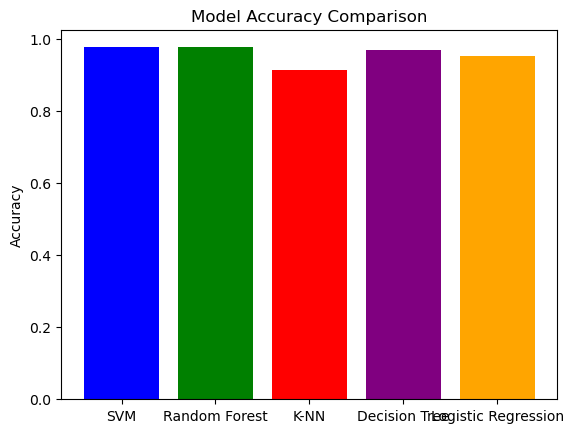

In [19]:
# Final comparison of the model accuracies
models = ['SVM', 'Random Forest', 'K-NN', 'Decision Tree', 'Logistic Regression']
accuracies = [
    accuracy_score(y_test, y_test_pred_svc),
    accuracy_score(y_test, y_test_pred_rf),
    accuracy_score(y_test, y_test_pred_knn),
    accuracy_score(y_test, y_test_pred_dt),
    accuracy_score(y_test, y_test_pred_logistic)
]

plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [20]:
with open('Spam SMS Detection.pickle', 'wb') as file:
     pickle.dump(rf, file)

In [21]:
with open('vectorizer.pickle', 'wb') as vectorizer_file:
    pickle.dump(feature_extraction, vectorizer_file)